# **The Small Long: Real Estate Multi Regression Project**

This project aims to explore how to predict the prices of various real estate properties in the given dataset location by assessing the following variables: lot area, square footage, bed/bath numbers, garage capacity, wood deck square footage, year built, and year remodeled. This is a multiple regression problem with SalePrice as the target variable and property characteristics as predictors. Understanding these relationships helps us prepare for the future, when we’ll need to evaluate real estate and decide which properties are worth investing in.


### **Data Exploration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housingPrices = pd.read_csv("Data/Housing_Prices_24.csv")
housingPrices.head(5)

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,0,Inside,1Fam,2003,2003,PConc,Y,Gd,Y,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,0,FR2,1Fam,1976,1976,CBlock,Y,TA,Y,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,0,Inside,1Fam,2001,2002,PConc,Y,Gd,Y,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,0,Corner,1Fam,1915,1970,BrkTil,Y,Gd,Y,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,0,FR2,1Fam,2000,2000,PConc,Y,Gd,Y,2008


We can see that columns LotConfig, BldgType, and Foundation are nonordinal variables.

In [3]:
print(f"Percent of KitchenQual that are missing values: {(housingPrices['KitchenQual']=='TA').sum()/len(housingPrices)*100}")

Percent of KitchenQual that are missing values: 50.34246575342466


### **Data Preparation**

Since we are running a regression, and we need ordinal or numerical variables, we can remove non-ordinal columns. We can also see that 50% of the values for KitchenQual are missing, so we can also remove this column. We can also drop the Id column since we can simply index the rows and the Id has no relation to SalePrice. Next, we want to convert binary variables such as centralAir or pavedDrive to numerical binary. We can also change variables that are presented with area data, but many of the rows are 0 since these features are luxury features. These variables we can convert to binary

In [4]:
cleaned_housing = housingPrices.drop(columns=['LotConfig','BldgType','Foundation','KitchenQual','Id'])
cleaned_housing['CentralAir'] = cleaned_housing['CentralAir'].map({'Y':1, 'N':0})
cleaned_housing['PavedDrive'] = cleaned_housing['PavedDrive'].map({'Y':1, 'N':0})
for col in ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']:
    cleaned_housing[col] = (cleaned_housing[col] > 0).astype(int)
cleaned_housing.head(5)

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold
0,208500,8450,856,856,854,2,1,3,8,0,...,1,0,0,0,0,2003,2003,1,1.0,2008
1,181500,9600,1262,1262,0,2,0,3,6,1,...,0,0,0,0,0,1976,1976,1,1.0,2007
2,223500,11250,920,920,866,2,1,3,6,1,...,1,0,0,0,0,2001,2002,1,1.0,2008
3,140000,9550,756,961,756,1,0,3,7,1,...,1,1,0,0,0,1915,1970,1,1.0,2006
4,250000,14260,1145,1145,1053,2,1,4,9,1,...,1,0,0,0,0,2000,2000,1,1.0,2008


Next we want to find the correlation of these variables against SalePrice and filter out the columns with very low correlations (correlations below or equal to 0.3).

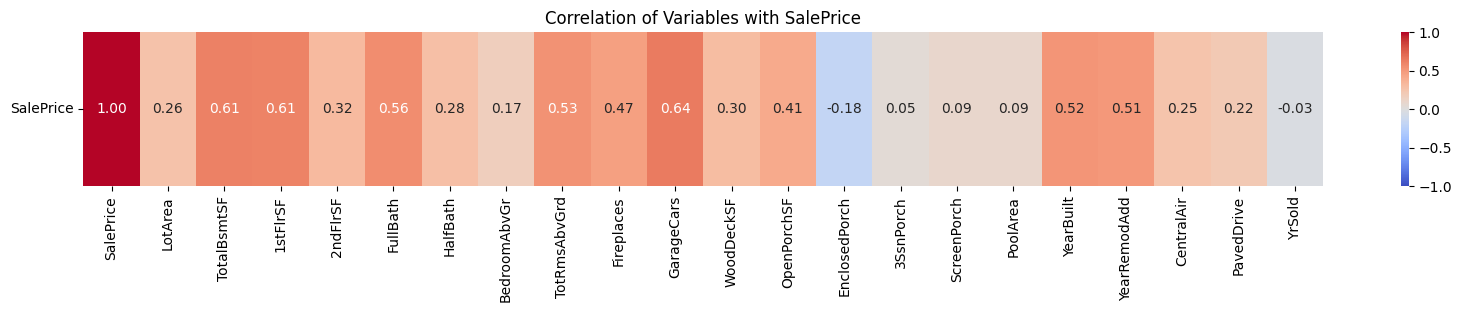

In [5]:
corr = cleaned_housing.corr()
saleprice_row = corr.loc[['SalePrice']]

plt.figure(figsize=(20, 2))
sns.heatmap(saleprice_row, annot=True, cmap='coolwarm', fmt=".2f",
            vmin=-1, vmax=1)

plt.title('Correlation of Variables with SalePrice')
plt.yticks(rotation=0)  # keep SalePrice label readable
plt.show()

In [6]:
cleaned_housing = cleaned_housing.drop(columns=['LotArea','HalfBath','BedroomAbvGr','WoodDeckSF','EnclosedPorch','3SsnPorch','PoolArea','CentralAir','PavedDrive','YrSold'])
cleaned_housing.head(5)

,SalePrice,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,ScreenPorch,YearBuilt,YearRemodAdd
0,208500,856,856,854,2,8,0,2,1,0,2003,2003
1,181500,1262,1262,0,2,6,1,2,0,0,1976,1976
2,223500,920,920,866,2,6,1,2,1,0,2001,2002
3,140000,756,961,756,1,7,1,3,1,0,1915,1970
4,250000,1145,1145,1053,2,9,1,3,1,0,2000,2000


Next we want to check the correlation of these variables against each other to ensure we will not repeat information in the regression. If a variable has a correlation greater than 0.8 with another, we will drop one of them. If a variable has a high correlation with multiple variables we will also drop that column.

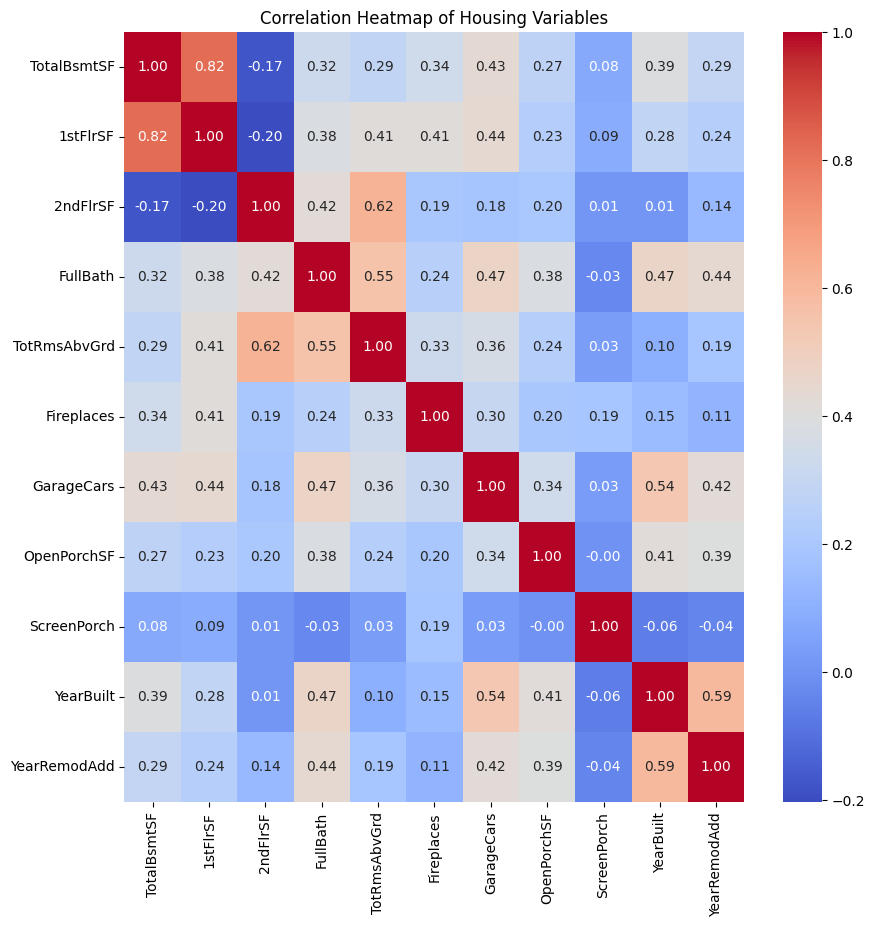

In [7]:
corr2 = cleaned_housing.drop(columns=['SalePrice']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Variables')
plt.show()

Using the logic listed above, we can drop TotRmsAbvGrd and TotalBsmtSF.

In [8]:
cleaned_housing = cleaned_housing.drop(columns=['TotRmsAbvGrd','TotalBsmtSF'])
cleaned_housing.head(5)

,SalePrice,1stFlrSF,2ndFlrSF,FullBath,Fireplaces,GarageCars,OpenPorchSF,ScreenPorch,YearBuilt,YearRemodAdd
0,208500,856,854,2,0,2,1,0,2003,2003
1,181500,1262,0,2,1,2,0,0,1976,1976
2,223500,920,866,2,1,2,1,0,2001,2002
3,140000,961,756,1,1,3,1,0,1915,1970
4,250000,1145,1053,2,1,3,1,0,2000,2000


### **Visualization*3**

### **Regression Model**

### **Hypothesis Test**